In [13]:
%matplotlib inline
import os  
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [43]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [4]:
train_data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [44]:
train_features = train_data.iloc[:,2:202]
train_target = train_data.iloc[:,1]

In [45]:
seed = 123
train_f,test_f,train_t,test_t = train_test_split(train_features,train_target, test_size=0.2, random_state = seed)


In [8]:
dtrain = xgb.DMatrix(train_f, label=train_t)
dtest = xgb.DMatrix(test_f, label=test_t)
watchlist = [(dtrain, 'train'), (dtest, 'test')]
xgb_pars = {'min_child_weight': 1, 'eta': 0.2, 'colsample_bytree': 0.9, 
        'max_depth': 6, 'subsample': 0.9, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1, 'eval_metric': 'auc'}
model = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds=2, maximize=False, verbose_eval=1)
print('Modeling AUC %.5f' % model.best_score)

[0]	train-auc:0.640434	test-auc:0.63569
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 2 rounds.
[1]	train-auc:0.700495	test-auc:0.688297
[2]	train-auc:0.724675	test-auc:0.70293
[3]	train-auc:0.742968	test-auc:0.715183
[4]	train-auc:0.75589	test-auc:0.724821
[5]	train-auc:0.769289	test-auc:0.735828
[6]	train-auc:0.780955	test-auc:0.744814
[7]	train-auc:0.792957	test-auc:0.75396
[8]	train-auc:0.801898	test-auc:0.758089
[9]	train-auc:0.811314	test-auc:0.763812
Modeling AUC 0.76381


In [41]:
dtrain = xgb.DMatrix(train_f, label=train_t)
dtest = xgb.DMatrix(test_f, label=test_t)
watchlist = [(dtrain, 'train'), (dtest, 'test')]
xgb_pars = { 'n_estimators':7000, 'learning_rate':0.27, 'booster' : 'gbtree', 'silent': 1, 'eval_metric': 'auc'}
model = xgb.train(xgb_pars, dtrain,180,watchlist, early_stopping_rounds=1000, maximize=False, verbose_eval=1)
print('Modeling AUC %.5f' % model.best_score)

[0]	train-auc:0.650875	test-auc:0.640318
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 1000 rounds.
[1]	train-auc:0.699214	test-auc:0.681841
[2]	train-auc:0.733378	test-auc:0.70565
[3]	train-auc:0.751364	test-auc:0.719877
[4]	train-auc:0.770468	test-auc:0.734909
[5]	train-auc:0.783461	test-auc:0.745121
[6]	train-auc:0.794022	test-auc:0.751457
[7]	train-auc:0.80163	test-auc:0.756208
[8]	train-auc:0.810733	test-auc:0.763626
[9]	train-auc:0.818494	test-auc:0.768556
[10]	train-auc:0.826271	test-auc:0.772602
[11]	train-auc:0.832342	test-auc:0.776765
[12]	train-auc:0.838959	test-auc:0.78168
[13]	train-auc:0.844263	test-auc:0.785693
[14]	train-auc:0.849813	test-auc:0.789116
[15]	train-auc:0.854678	test-auc:0.79109
[16]	train-auc:0.858274	test-auc:0.792764
[17]	train-auc:0.862244	test-auc:0.795154
[18]	train-auc:0.867347	test-auc:0.798377
[19]	train-auc:0.870534	test-auc:0.799474
[20]	train-auc:0.874414	test-au

In [90]:
%%time
dtrain = xgb.DMatrix(train_f, label=train_t)
dtest = xgb.DMatrix(test_f, label=test_t)
watchlist = [ (dtrain, 'train'),(dtest, 'test')]
xgb_pars = {'n_estimator':7000 , 'n_job'
        'max_depth': 7, 'subsample': 0.9, 'lambda': 0.3, 'nthread': -1, 'booster' : 'gbtree', 'silent': 1, 'eval_metric': 'auc','gamma':10}
xgb_pars = {'booster':'gbtree', 'eval_metric': 'auc'}
model = xgb.train(xgb_pars, dtrain, 10, watchlist, early_stopping_rounds=40, maximize=False, verbose_eval=1)
print('Modeling AUC %.5f' % model.best_score)

[0]	test-auc:0.640318
Will train until test-auc hasn't improved in 40 rounds.
[1]	test-auc:0.686169
[2]	test-auc:0.710856
[3]	test-auc:0.726141
[4]	test-auc:0.740111
[5]	test-auc:0.749431
[6]	test-auc:0.755769
[7]	test-auc:0.761401
[8]	test-auc:0.767064
[9]	test-auc:0.772494
Modeling AUC 0.77249
Wall time: 6.61 s


In [24]:
test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [25]:
test_features = test_data.iloc[:,1:201]

In [48]:
test_fe = xgb.DMatrix(test_f)

In [49]:
predictions = model.predict(test_fe)

In [ ]:
Final_Predictions = pd.DataFrame()
Final_Predictions['ID_code'] = test_data.iloc[:,0]
Final_Predictions['target'] = predictions
Final_Predictions.to_csv('Final_Predictions.csv',index=False)

In [33]:
model = xgb.XGBClassifier(n_estimator = 7000, n_jobs=-1, learning_rate = 0.27,eval_metric = 'auc')
model.fit(train_f,train_t,eval_set =[(test_f,test_t)],early_stopping_rounds=1000)
print('Modeling AUC %.5f' % model.best_score)

[0]	validation_0-auc:0.605206
Will train until validation_0-auc hasn't improved in 1000 rounds.
[1]	validation_0-auc:0.63053
[2]	validation_0-auc:0.649792
[3]	validation_0-auc:0.675227
[4]	validation_0-auc:0.677415
[5]	validation_0-auc:0.684003
[6]	validation_0-auc:0.695097
[7]	validation_0-auc:0.705489
[8]	validation_0-auc:0.712722
[9]	validation_0-auc:0.718086
[10]	validation_0-auc:0.727145
[11]	validation_0-auc:0.737506
[12]	validation_0-auc:0.744878
[13]	validation_0-auc:0.750728
[14]	validation_0-auc:0.754774
[15]	validation_0-auc:0.758459
[16]	validation_0-auc:0.765661
[17]	validation_0-auc:0.770432
[18]	validation_0-auc:0.772928
[19]	validation_0-auc:0.774552
[20]	validation_0-auc:0.778606
[21]	validation_0-auc:0.781806
[22]	validation_0-auc:0.784123
[23]	validation_0-auc:0.786635
[24]	validation_0-auc:0.789317
[25]	validation_0-auc:0.791772
[26]	validation_0-auc:0.793336
[27]	validation_0-auc:0.794991
[28]	validation_0-auc:0.79868
[29]	validation_0-auc:0.80035
[30]	validation_0

Text(0.5, 0, 'False Positive Rate')

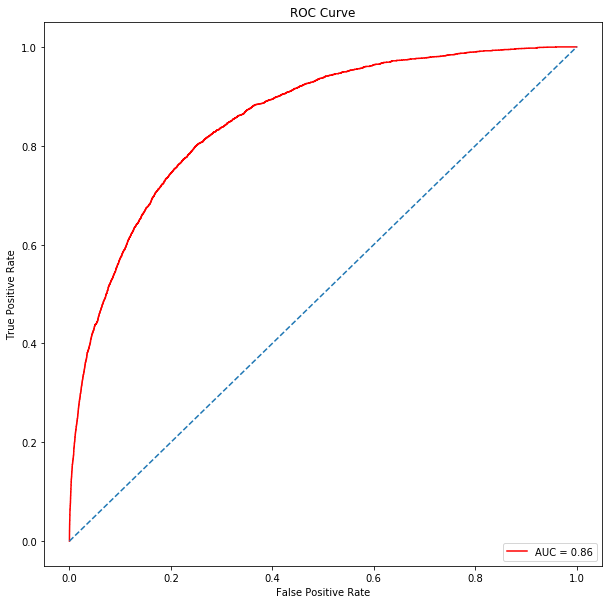

In [50]:
from sklearn.metrics import roc_curve, auc
fp,tp,thresholds = roc_curve(test_t,predictions)
roc_auc = auc(fp, tp)
roc_auc
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,10))
plt.title('ROC Curve')
plt.plot(fp,tp, color ='red', label = 'AUC = %0.2f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [20]:
Final_Predictions_ = pd.DataFrame()
Final_Predictions_['ID_code'] = test_data.iloc[:,0]
Final_Predictions_['target'] = predictions
Final_Predictions_.to_csv('Final_Predictions.csv',index=False)